In [1]:
!pip install yfinance --quiet

In [2]:
from logging import warning
import yfinance as yf
from datetime import datetime, date
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_inicio = '1985-01-01'
data_fim = pd.Timestamp.today().strftime('%Y-%m-%d')

# Análise Gráfica

In [4]:
ativos = ['KO', '^GSPC','^TNX']

In [5]:
dados = yf.download(ativos, start=data_inicio, end=data_fim, interval='1mo')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [6]:
dados.tail()

,KO,^GSPC,^TNX
Date,,,
2023-05-01,59.209068,4179.830078,3.637
2023-06-01,59.764839,4450.379883,3.819
2023-07-01,61.930000,4588.959961,3.959
2023-08-01,59.830002,4507.660156,4.093
2023-09-01,58.330002,4457.490234,4.258


In [7]:
scaler = MinMaxScaler()

In [8]:
dados_normalizados = scaler.fit_transform(dados)

In [9]:
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=dados.columns, index=dados.index)

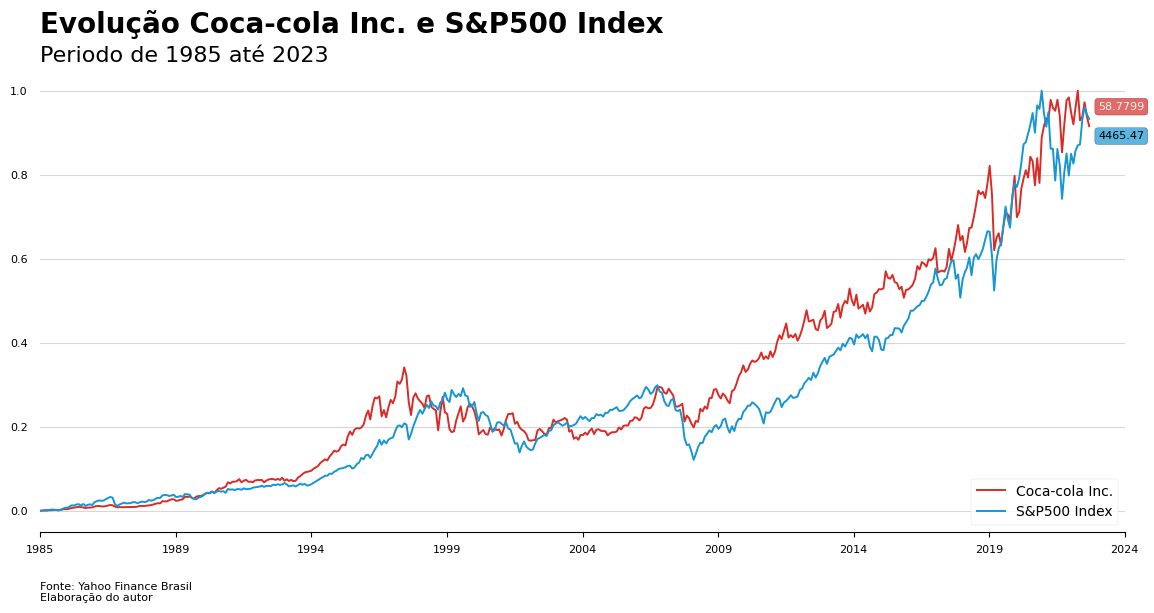

In [10]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Evolução Coca-cola Inc. e S&P500 Index', fontsize = 20, fontweight='bold', x = 0.3475)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados_normalizados_df.index, dados_normalizados_df['KO'], label='Coca-cola Inc.', color='#db2b27')
plt.plot(dados_normalizados_df.index, dados_normalizados_df['^GSPC'], label='S&P500 Index', color='#1696d2')
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

data_text = datetime.datetime(2024, 1, 1)
bbox_props = dict(boxstyle='round', facecolor='#1696d2', alpha=0.7)
bbox_props2 = dict(boxstyle='round', facecolor='#db2b27', alpha=0.7)
ax.text(data_text, 0.95, '58.7799', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props2, color='#f5f5f5')
ax.text(data_text, 0.88, '4465.47', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props)

plt.legend(loc='lower right', fontsize=10)
plt.show()

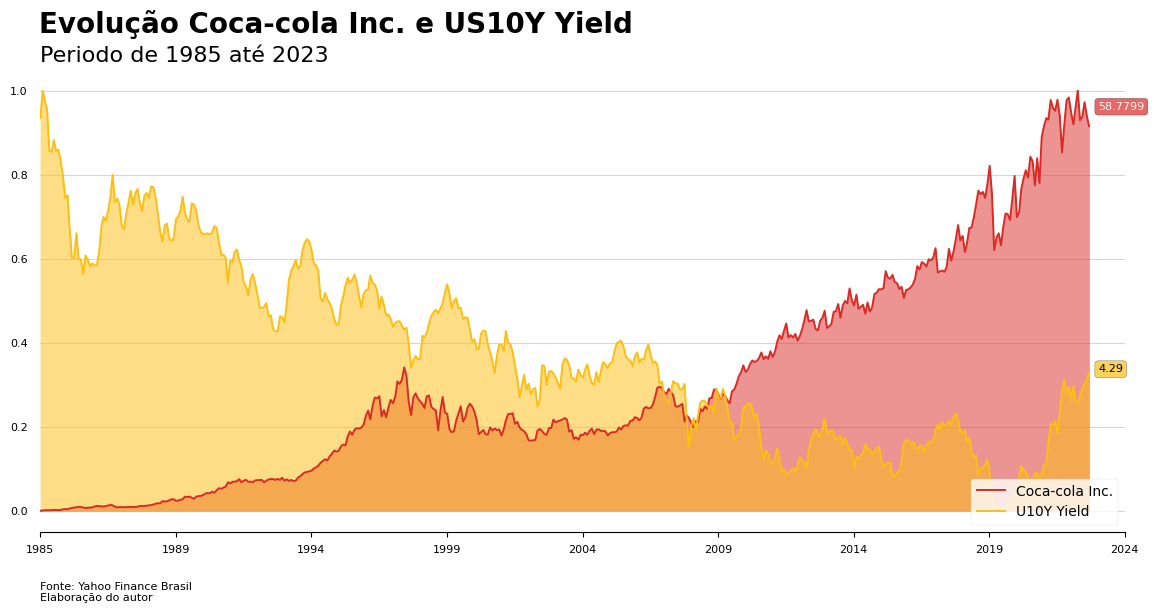

In [11]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Evolução Coca-cola Inc. e US10Y Yield', fontsize = 20, fontweight='bold', x = 0.336)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados_normalizados_df.index, dados_normalizados_df['KO'], label='Coca-cola Inc.', color='#db2b27')
plt.fill_between(dados_normalizados_df.index, dados_normalizados_df['KO'], color='#db2b27', alpha=0.5)
plt.plot(dados_normalizados_df.index, dados_normalizados_df['^TNX'], label='U10Y Yield', color='#fdbf11')
plt.fill_between(dados_normalizados_df.index, dados_normalizados_df['^TNX'], color='#fdbf11', alpha=0.5)
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

data_text = datetime.datetime(2024, 1, 1)
bbox_props = dict(boxstyle='round', facecolor='#fdbf11', alpha=0.7)
bbox_props2 = dict(boxstyle='round', facecolor='#db2b27', alpha=0.7)
ax.text(data_text, 0.95, '58.7799', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props2, color='#f5f5f5')
ax.text(data_text, 0.325, '4.29', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props, color='#000000')

plt.legend(loc='lower right', fontsize=10)
plt.show()

In [12]:
dados['Log KO'] = np.log( 1 + dados['KO'].pct_change()).fillna(0)
dados['Log ^GSPC'] = np.log( 1 + dados['^GSPC'].pct_change()).fillna(0)
dados.tail()

,KO,^GSPC,^TNX,Log KO,Log ^GSPC
Date,,,,,
2023-05-01,59.209068,4179.830078,3.637,-0.072562,0.002479
2023-06-01,59.764839,4450.379883,3.819,0.009343,0.062719
2023-07-01,61.930000,4588.959961,3.959,0.035587,0.030664
2023-08-01,59.830002,4507.660156,4.093,-0.034497,-0.017875
2023-09-01,58.330002,4457.490234,4.258,-0.025391,-0.011192


In [13]:
dados['Cum Log KO'] = np.cumprod(1 + np.array(dados['Log KO'])) - 1
dados['Cum Log ^GSPC'] = np.cumprod(1 + np.array(dados['Log ^GSPC'])) - 1

In [14]:
dados.tail()

,KO,^GSPC,^TNX,Log KO,Log ^GSPC,Cum Log KO,Cum Log ^GSPC
Date,,,,,,,
2023-05-01,59.209068,4179.830078,3.637,-0.072562,0.002479,51.494289,13.450282
2023-06-01,59.764839,4450.379883,3.819,0.009343,0.062719,51.984733,14.356588
2023-07-01,61.930000,4588.959961,3.959,0.035587,0.030664,53.870311,14.827481
2023-08-01,59.830002,4507.660156,4.093,-0.034497,-0.017875,51.977424,14.544562
2023-09-01,58.330002,4457.490234,4.258,-0.025391,-0.011192,50.632291,14.370582


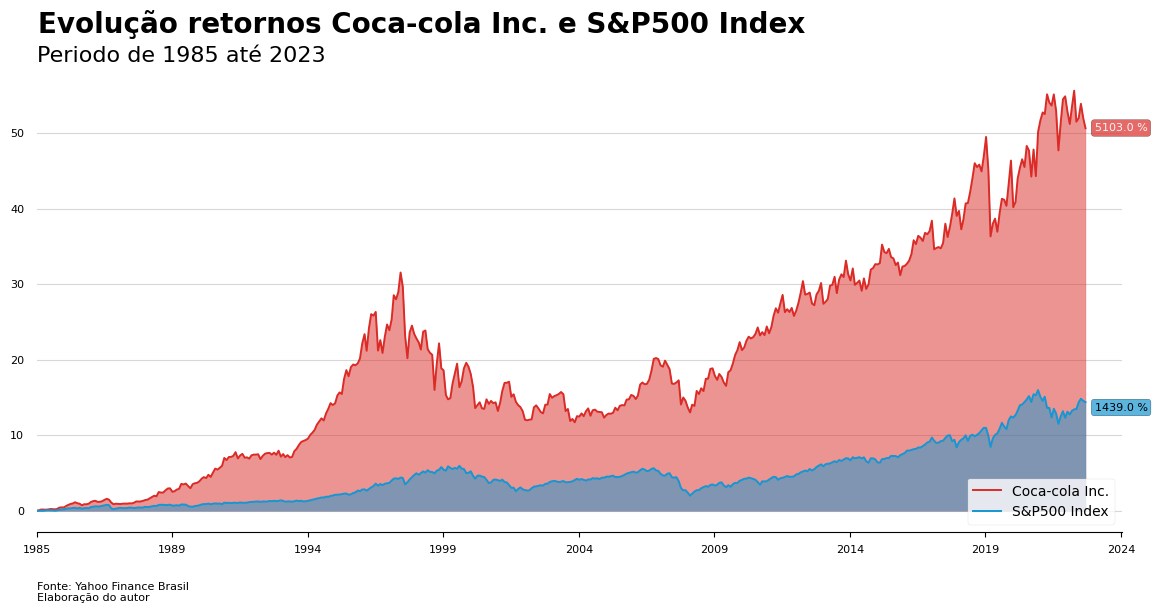

In [15]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Evolução retornos Coca-cola Inc. e S&P500 Index', fontsize = 20, fontweight='bold', x = 0.4)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados.index, dados['Cum Log KO'], label='Coca-cola Inc.', color='#db2b27')
plt.fill_between(dados.index, dados['Cum Log KO'], color='#db2b27', alpha=0.5)
plt.plot(dados.index, dados['Cum Log ^GSPC'], label='S&P500 Index', color='#1696d2')
plt.fill_between(dados.index, dados['Cum Log ^GSPC'], color='#1696d2', alpha=0.5)
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

data_text = datetime.datetime(2024, 1, 1)
bbox_props = dict(boxstyle='round', facecolor='#1696d2', alpha=0.7)
bbox_props2 = dict(boxstyle='round', facecolor='#db2b27', alpha=0.7)
ax.text(data_text, 50, f'{51.03 * 100} %', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props2, color='#f5f5f5')
ax.text(data_text, 13, f'{14.39 * 100} %', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props)

plt.legend(loc='lower right', fontsize=10)
plt.show()

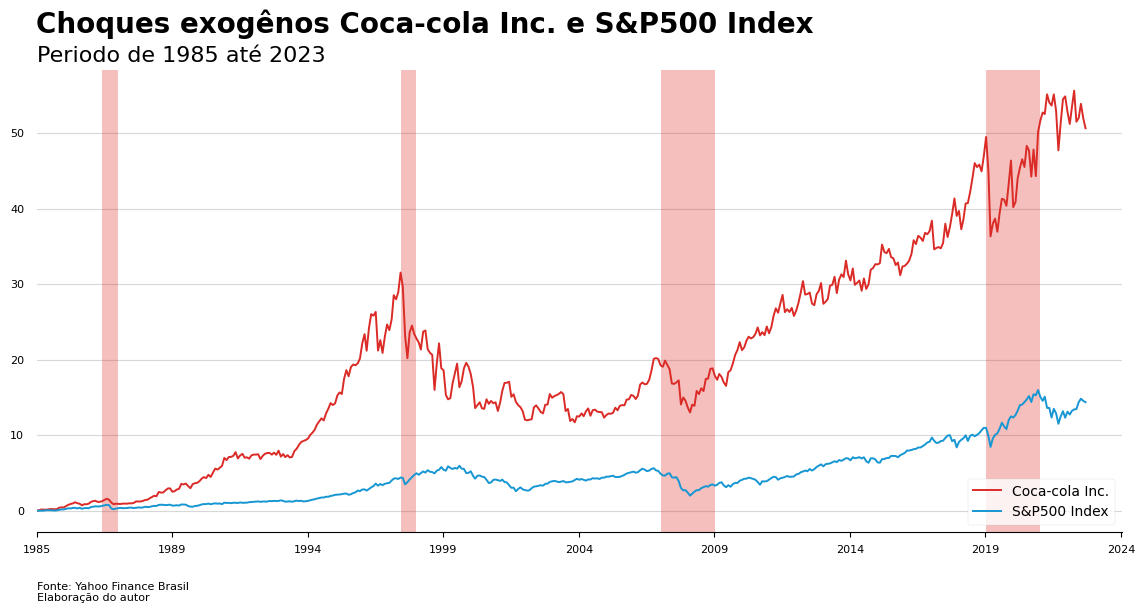

In [16]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Choques exogênos Coca-cola Inc. e S&P500 Index', fontsize = 20, fontweight='bold', x = 0.402)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados.index, dados['Cum Log KO'], label='Coca-cola Inc.', color='#db2b27')
plt.plot(dados.index, dados['Cum Log ^GSPC'], label='S&P500 Index', color='#1696d2')
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

plt.axvspan(datetime.datetime(1987, 6, 1), datetime.datetime(1987, 12, 31), facecolor='#db2b27', alpha=0.3)
plt.axvspan(datetime.datetime(1998, 6, 1), datetime.datetime(1998, 12, 31), facecolor='#db2b27', alpha=0.3)
plt.axvspan(datetime.datetime(2008, 1, 1), datetime.datetime(2009, 12, 31), facecolor='#db2b27', alpha=0.3)
plt.axvspan(datetime.datetime(2020, 1, 1), datetime.datetime(2021, 12, 31), facecolor='#db2b27', alpha=0.3)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

plt.legend(loc='lower right', fontsize=10)
plt.show()

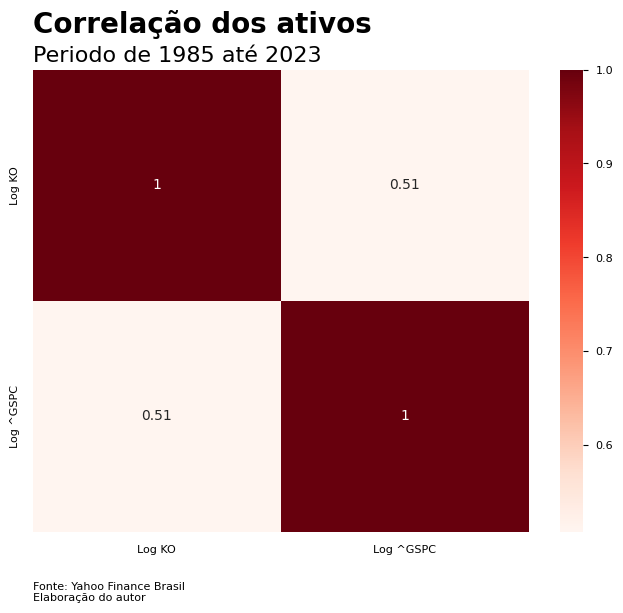

In [17]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Correlação dos ativos', fontsize = 20, fontweight='bold', x = 0.3375)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')
sns.heatmap(dados[['Log KO','Log ^GSPC']].corr(), cmap = 'Reds', annot = True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

plt.show()

In [18]:
corr_exog = dados[(dados.index >= '1987-06-01') & (dados.index <= '1987-12-31') | (dados.index >= '1998-06-01') & (dados.index <= '1998-12-31') | (dados.index >= '2008-01-01') & (dados.index <= '2009-12-31') | (dados.index >= '2020-01-01') & (dados.index <= '2021-12-31')]

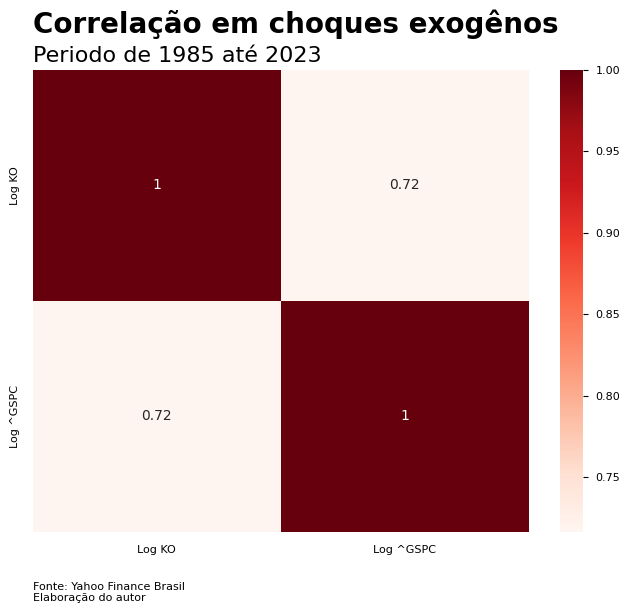

In [19]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Correlação em choques exogênos', fontsize = 20, fontweight='bold', x = 0.454)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')
sns.heatmap(corr_exog[['Log KO','Log ^GSPC']].corr(), cmap = 'Reds', annot = True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

plt.show()

In [20]:
dados['KO Drawdown'] = (dados['Cum Log KO'] / dados['Cum Log KO'].cummax()) - 1
dados['^GSPC Drawdown'] = (dados['Cum Log ^GSPC'] / dados['Cum Log ^GSPC'].cummax()) - 1

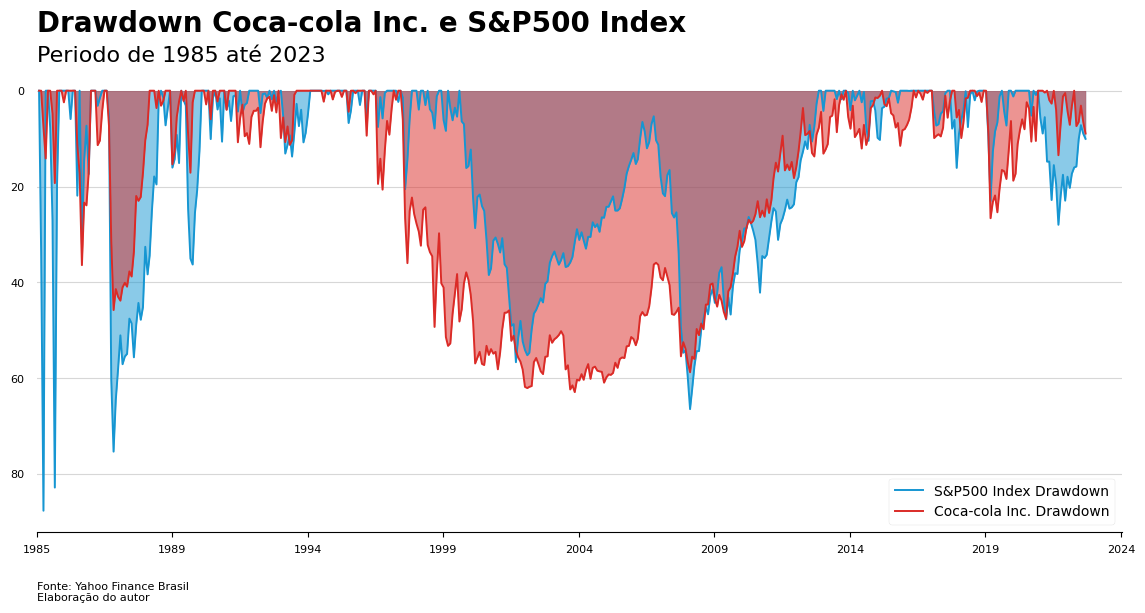

In [21]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Drawdown Coca-cola Inc. e S&P500 Index', fontsize = 20, fontweight='bold', x = 0.35675)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados.index, -dados['^GSPC Drawdown'] * 100, label='S&P500 Index Drawdown', color='#1696d2')
plt.fill_between(dados.index, -dados['^GSPC Drawdown'] * 100, color='#1696d2', alpha=0.5)
plt.plot(dados.index, -dados['KO Drawdown'] * 100, label='Coca-cola Inc. Drawdown', color='#db2b27')
plt.fill_between(dados.index, -dados['KO Drawdown'] * 100, color='#db2b27', alpha=0.5)

plt.gca().invert_yaxis()

plt.gca().set_axisbelow(True)

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))
plt.legend(loc='lower right', fontsize=10)
plt.show()

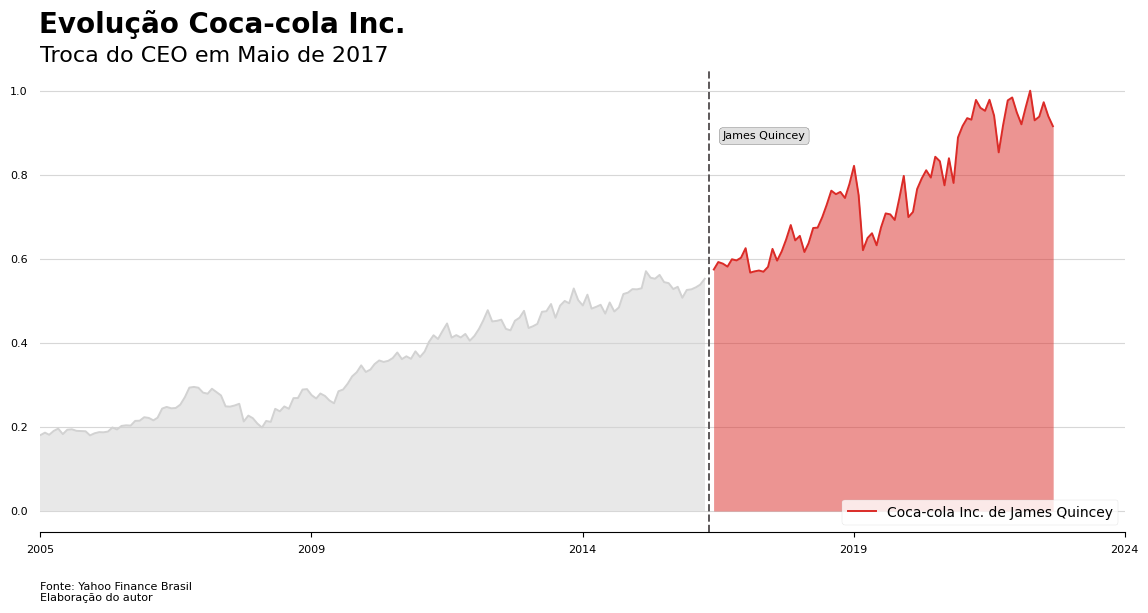

In [22]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Evolução Coca-cola Inc.', fontsize = 20, fontweight='bold', x = 0.255)
plt.title('Troca do CEO em Maio de 2017', fontsize = 16, loc='left')

indice_vertical = dados_normalizados_df.index.get_loc(datetime.datetime(2017, 5, 1))
dados_anteriores = dados_normalizados_df.iloc[:indice_vertical]
dados_posteriores = dados_normalizados_df.iloc[indice_vertical+1:]

data_vertical = datetime.datetime(2017, 5, 1)
data_text = datetime.datetime(2017, 8, 1)

plt.plot(dados_anteriores.index, dados_anteriores['KO'], color='#d2d2d2')
plt.fill_between(dados_anteriores.index, dados_anteriores['KO'], color='#d2d2d2', alpha=0.5)
plt.plot(dados_posteriores.index, dados_posteriores['KO'], label='Coca-cola Inc. de James Quincey', color='#db2b27')
plt.fill_between(dados_posteriores.index, dados_posteriores['KO'], color='#db2b27', alpha=0.5)
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(2005, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(2005, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

ax.axvline(data_vertical, color='#5c5859', linestyle='--')
bbox_props = dict(boxstyle='round', facecolor='lightgray', alpha=0.7)
ax.text(data_text, 0.88, 'James Quincey', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props)

plt.legend(loc='lower right', fontsize=10)
plt.show()

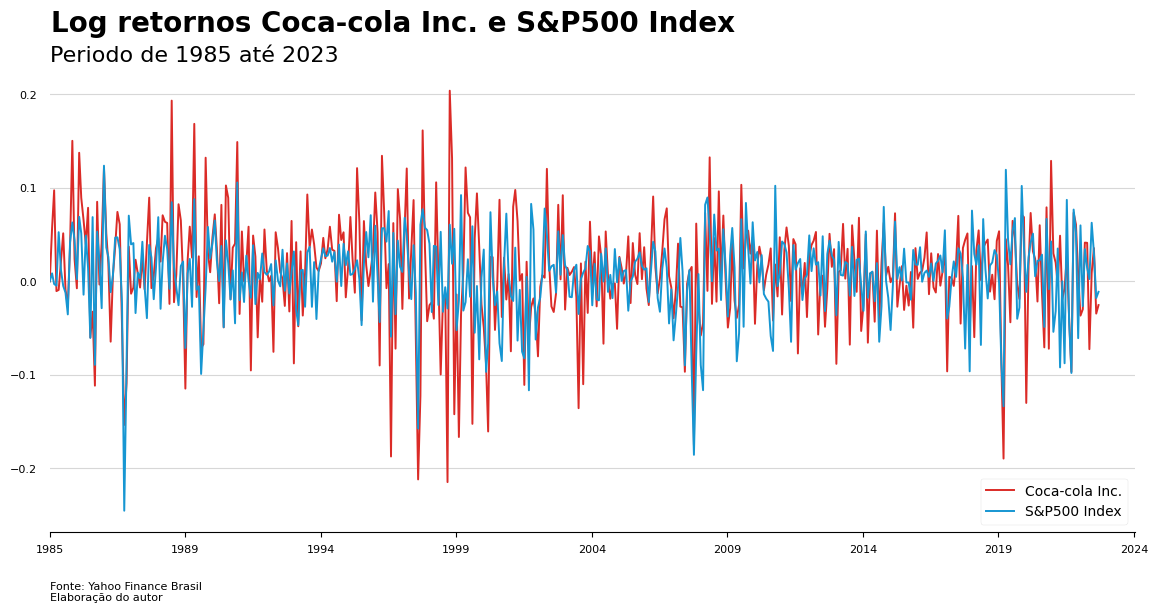

In [23]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Log retornos Coca-cola Inc. e S&P500 Index', fontsize = 20, fontweight='bold', x = 0.37)
plt.title('Periodo de 1985 até 2023', fontsize = 16, loc='left')

plt.plot(dados.index, dados['Log KO'], label='Coca-cola Inc.', color='#db2b27')
plt.plot(dados.index, dados['Log ^GSPC'], label='S&P500 Index', color='#1696d2')
plt.gca().set_axisbelow(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')
plt.xlim(datetime.datetime(1985, 1, 1), datetime.datetime(2025, 1, 1))

inicio = datetime.datetime(1985, 1, 1)
fim = datetime.datetime(2025, 1, 1)
intervalo = datetime.timedelta(days=365 * 5)
anos = [inicio + i * intervalo for i in range((fim - inicio).days // intervalo.days + 1)]
plt.xticks(anos, [ano.year for ano in anos])

plt.grid(axis='y', linestyle='-', alpha=0.5)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

plt.legend(loc='lower right', fontsize=10)
plt.show()

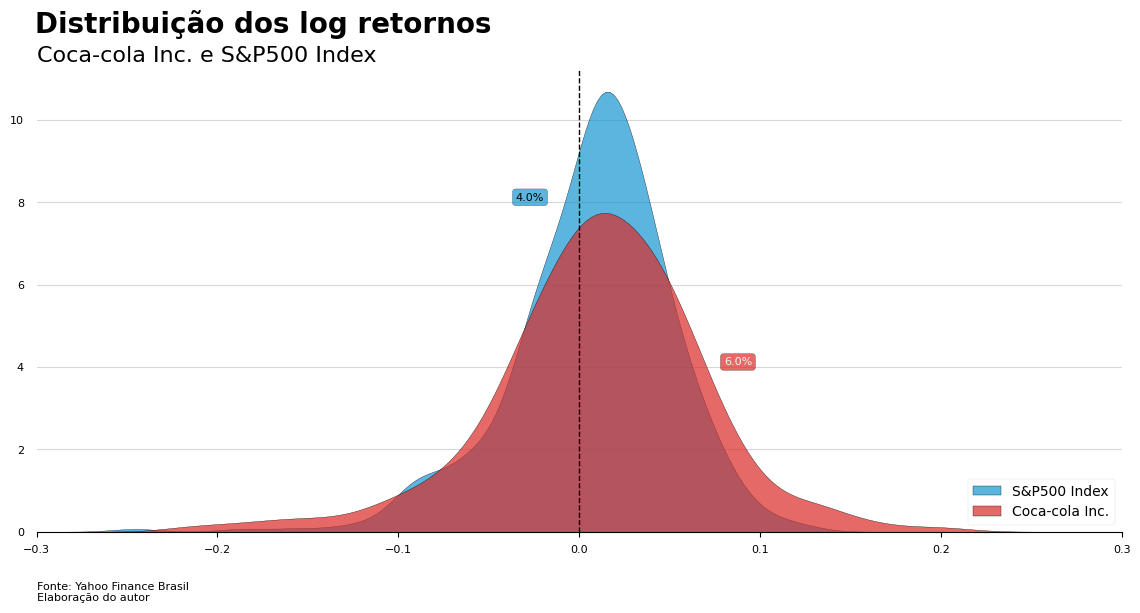

In [24]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Distribuição dos log retornos', fontsize = 20, fontweight='bold', x = 0.287)
plt.title('Coca-cola Inc. e S&P500 Index', fontsize = 16, loc='left')

sns.kdeplot(dados['Log ^GSPC'], label='S&P500 Index', color='#1696d2', multiple="stack", alpha=0.7)
sns.kdeplot(dados['Log KO'], label='Coca-cola Inc.', color='#db2b27', multiple="stack", alpha=0.7)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.gca().set_axisbelow(True)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')
ax.axvline(0, color='#000000', linestyle='--', lw=1)
plt.xticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
plt.xlim(-0.3,0.3)
ax.yaxis.set_ticks_position('none')

plt.xlabel('')
plt.ylabel('')

dpko = dados['Log KO'].std().round(2) * 100
dpsp = dados['Log ^GSPC'].std().round(2) * 100

bbox_props = dict(boxstyle='round', facecolor='#1696d2', alpha=0.7)
bbox_props2 = dict(boxstyle='round', facecolor='#db2b27', alpha=0.7)
ax.text(0.08, 4, f'{dpko}%', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props2, color='#f5f5f5')
ax.text(-0.035, 8, f'{dpsp}%', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props)

plt.legend(loc='lower right', fontsize=10)
plt.show()

# Modelo CAPM

In [25]:
Rf = ((1 + (dados['^TNX'][-1] / 100)) ** (1/12)) - 1
Rf

0.0034809117982808058

In [26]:
Rm = dados['Log ^GSPC'].mean()
Rm

0.006906326778368773

In [27]:
Pr = (Rm - Rf)
Pr

0.0034254149800879673

In [28]:
Eri = dados['Log KO'].mean()
Eri

0.010261674799848764

In [29]:
Cov = dados[['Log KO','Log ^GSPC']].cov()
Cov

,Log KO,Log ^GSPC
Log KO,0.003440,0.001322
Log ^GSPC,0.001322,0.001975


In [30]:
Var = dados['Log ^GSPC'].var()
Var

0.001975371272280982

In [31]:
Beta = (Cov.iloc[1, 0] / Var)
Beta

0.6694042376016474

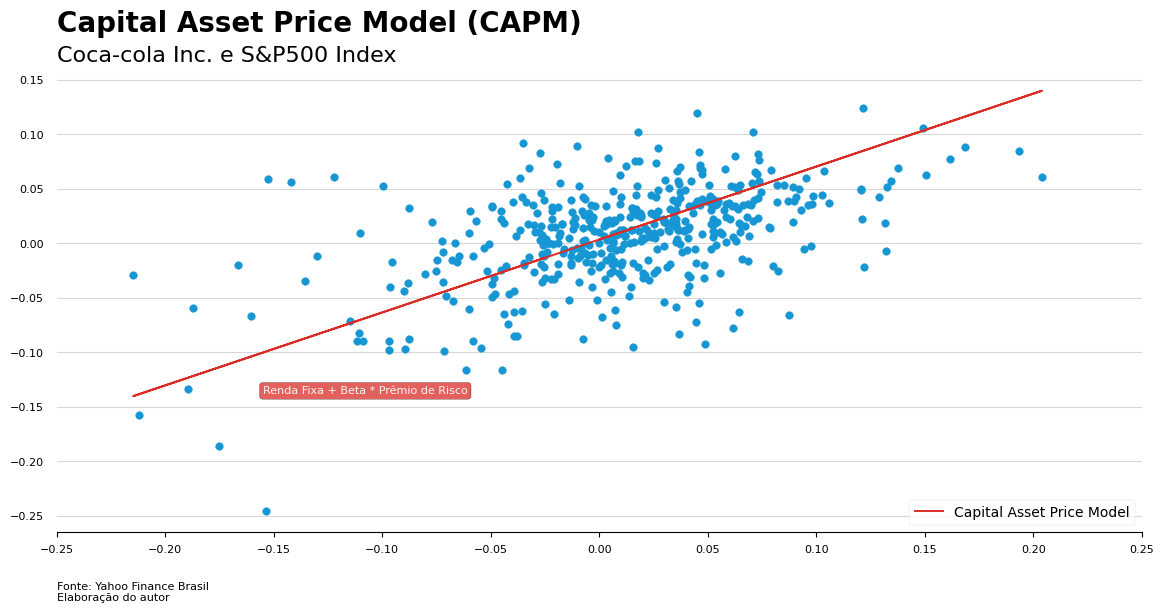

In [32]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Capital Asset Price Model (CAPM)', fontsize = 20, fontweight='bold', x = 0.3125)
plt.title('Coca-cola Inc. e S&P500 Index', fontsize = 16, loc='left')

x = dados['Log KO']

CAPM = Rf + Beta * x

plt.scatter(dados['Log KO'], dados['Log ^GSPC'], color = '#1696d2')
plt.plot(x, CAPM, color='#db2b27', label = 'Capital Asset Price Model')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.xticks([-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25])
plt.xlim(-0.25,0.25)

ax.yaxis.set_ticks_position('none')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.gca().set_axisbelow(True)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

bbox_props2 = dict(boxstyle='round', facecolor='#db2b27', alpha=0.75)
ax.text(-0.155, -0.14, 'Renda Fixa + Beta * Prêmio de Risco', rotation=0, verticalalignment='bottom', fontsize=8, bbox=bbox_props2, color='#f5f5f5')

plt.legend(loc='lower right', fontsize=10)
plt.show()

In [33]:
CAPM = Rf + Beta * (Rm - Rf)
CAPM

0.005773899101495854

In [34]:
AplhaJensen = Eri - (Rf + Beta * Pr)
print(f"Alpha de Jensen: {AplhaJensen:.4f}")

Alpha de Jensen: 0.0045


# Otimização de Portifólio Markowitz

In [35]:
LogRetornos = dados[['Log KO','Log ^GSPC']]
LogRetornos.head()

,Log KO,Log ^GSPC
Date,,
1985-01-01,0.000000,0.000000
1985-02-01,0.056696,0.008592
1985-03-01,0.097455,-0.002874
1985-04-01,-0.010408,-0.004605
1985-05-01,-0.009165,0.052641


In [36]:
Cov

,Log KO,Log ^GSPC
Log KO,0.003440,0.001322
Log ^GSPC,0.001322,0.001975


In [37]:
NumAtivos = len(ativos[0:2])
NumAtivos

2

In [38]:
NumPortifolios = 100000

In [39]:
Resultados = []

In [40]:
for _ in range(NumPortifolios):

    Weights = np.random.random(2)
    Weights /= np.sum(Weights)

    Rep = np.sum(LogRetornos.mean() * Weights) * 252

    Rscep = np.sqrt(np.dot(Weights.T, np.dot(Cov * 252, Weights)))

    Resultados.append([Rep, Rscep, Weights])

In [41]:
Resultados = pd.DataFrame(Resultados, columns=['Return', 'Risk', 'Weights'])

Sharpe = (Resultados['Return'] - 0.02) / Resultados['Risk']
Best = Resultados.iloc[Sharpe.idxmax()]

In [42]:
print("Alocação ótima:")
for Asset, Weight in zip(['KO', 'GSPC'], Best['Weights']):
    print(f"{Asset}: {Weight*100:.2f}%")
print(f"Retorno esperado da carteira: {Best['Return']*100:.2f}%")
print(f"Risco da carteira (desvio padrão): {Best['Risk']*100:.2f}%")

Alocação ótima:
KO: 52.52%
GSPC: 47.48%
Retorno esperado da carteira: 218.45%
Risco da carteira (desvio padrão): 71.94%


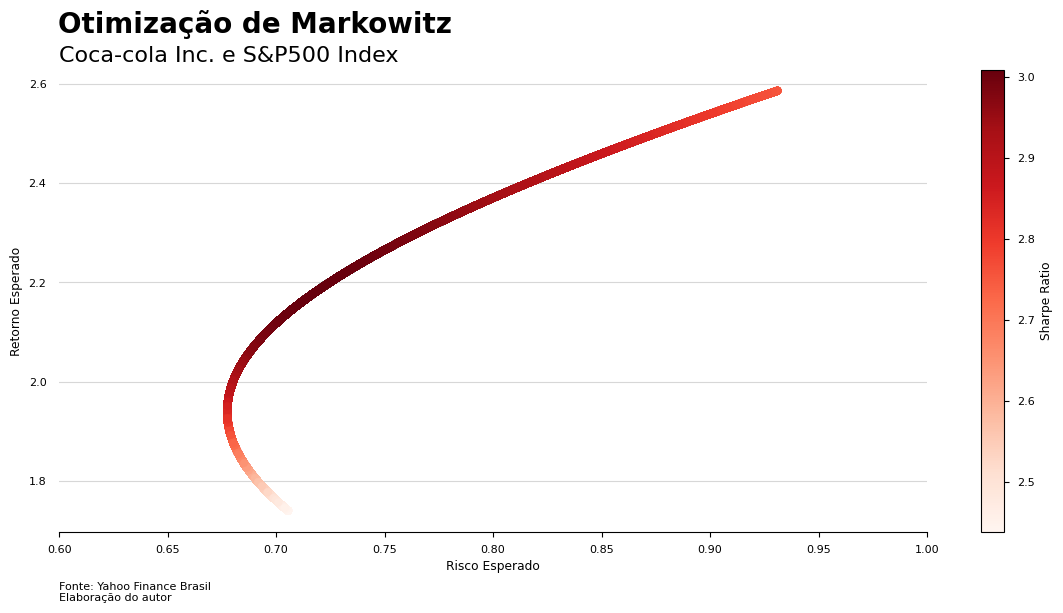

In [43]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-paper')

plt.suptitle('Otimização de Markowitz', fontsize = 20, fontweight='bold', x = 0.265)
plt.title('Coca-cola Inc. e S&P500 Index', fontsize = 16, loc='left')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.scatter(Resultados['Risk'], Resultados['Return'], c=Sharpe, cmap='Reds')

plt.xlabel('Risco Esperado')
plt.ylabel('Retorno Esperado')
plt.colorbar(label='Sharpe Ratio', cmap='Reds')

ax.yaxis.set_ticks_position('none')
plt.xticks([0.6,0.65,0.70,0.75,0.8,0.85,0.90,0.95,1])
plt.xlim(0.6,1)

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.gca().set_axisbelow(True)

annotate_text = "Fonte: Yahoo Finance Brasil\nElaboração do autor"
plt.annotate(annotate_text, (0, -0.15), xycoords='axes fraction', fontsize=8, ha='left')

plt.show()